# 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 이미지 로딩하기

In [31]:
import cv2
import numpy as np
import argparse
import os

path = '/content/drive/My Drive/Digital Image Processing/image/'

if os.path.isfile(path + '가천대학교.JPG'): 
  gachon = cv2.imread(path + '가천대학교.JPG')
else:
  print('no file')

gachon_rgb = gachon[:,:,::-1]

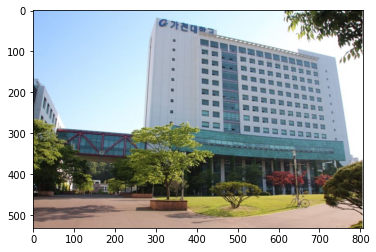

In [33]:
import matplotlib.pyplot as plt

plt.imshow(gachon_rgb)
plt.show()

In [5]:
fstr = '/content/drive/My Drive/Digital Image Processing/image/가천대학교.JPG'
pic = cv2.imread(fstr)

if pic is None:
    print('Error : Loading image')
else:
    print('OK : Loading image')
    

OK : Loading image


# Histogram Equalization

color 영상의 RGB 값에 바로 Histogram Equalization을 적용하면 색이 변할 수 있다. 따라서 먼저 RGB인 이미지를 HSV 또는 YCrCb 형태의 이미지로 변경한 후 밝기값 채널을 변경해야 색을 변경하지 않고 선명하게 만들 수 있다. 

1. 컬러 영상의 각 채널을 split 한다.
2. 각 채널별 값에 대해 Histogram Equalization을 실행한다.
3. Equalization 된 채널을 다시 merge하여 하나의 컬러 영상으로 만든다.

In [45]:
fstr = '/content/drive/My Drive/Digital Image Processing/image/가천대학교.JPG' 

src = cv2.imread(fstr)

#hsv 컬러 형태로 변형
hsv = cv2.cvtColor(gachon_rgb, cv2.COLOR_BGR2HSV)
#h, s, v로 컬러 영상을 분리
h, s, v = cv2.split(hsv)
#v값 히스토그램 평활화
equalizedV = cv2.equalizeHist(v)
#h,s,equalizedV를 합쳐서 새로운 hsv 이미지 만들기
hsv2 = cv2.merge([h,s,equalizedV])
#hsv2를 다시 BGR 형태로 변경
hsvDst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)


gachon_hstack1 = np.hstack( (gachon_rgb,hsvDst) )
print(gachon_hstack1.shape)
gachon_hstack1_rgb = gachon_hstack1[:,:,::-1]

(532, 1614, 3)


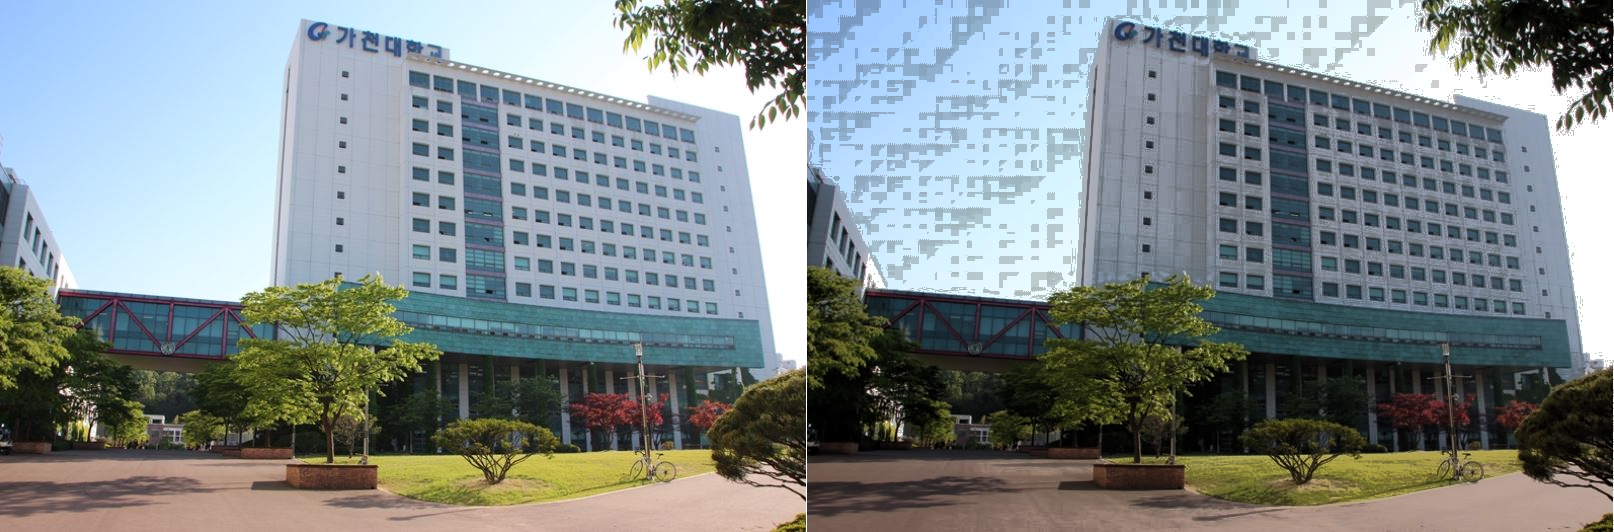

In [47]:
from google.colab.patches import cv2_imshow

cv2_imshow(gachon_hstack1_rgb)

In [48]:
fstr = '/content/drive/My Drive/Digital Image Processing/image/가천대학교.JPG' 

src = cv2.imread(fstr)

#YCrCb 컬러 형태로 변환

yCrCb = cv2.cvtColor(gachon_rgb, cv2.COLOR_BGR2YCrCb)
#y, Cr, Cb로 컬러 영상을 분리
y, Cr, Cb = cv2.split(yCrCb)
#y값을 히스토그램 평활화
equalizedY = cv2.equalizeHist(y)
#equalizedY, Cr, Cb를 합쳐서 새로운 yCrCb 이미지 만들기
yCrCb2 = cv2.merge([equalizedY, Cr, Cb])
#yCrCb2를 다시 BGR 형태로 변경
yCrCbDst = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)


gachon_hstack2 = np.hstack( (gachon_rgb,yCrCbDst) )
print(gachon_hstack2.shape)
gachon_hstack2_rgb = gachon_hstack2[:,:,::-1]

(532, 1614, 3)


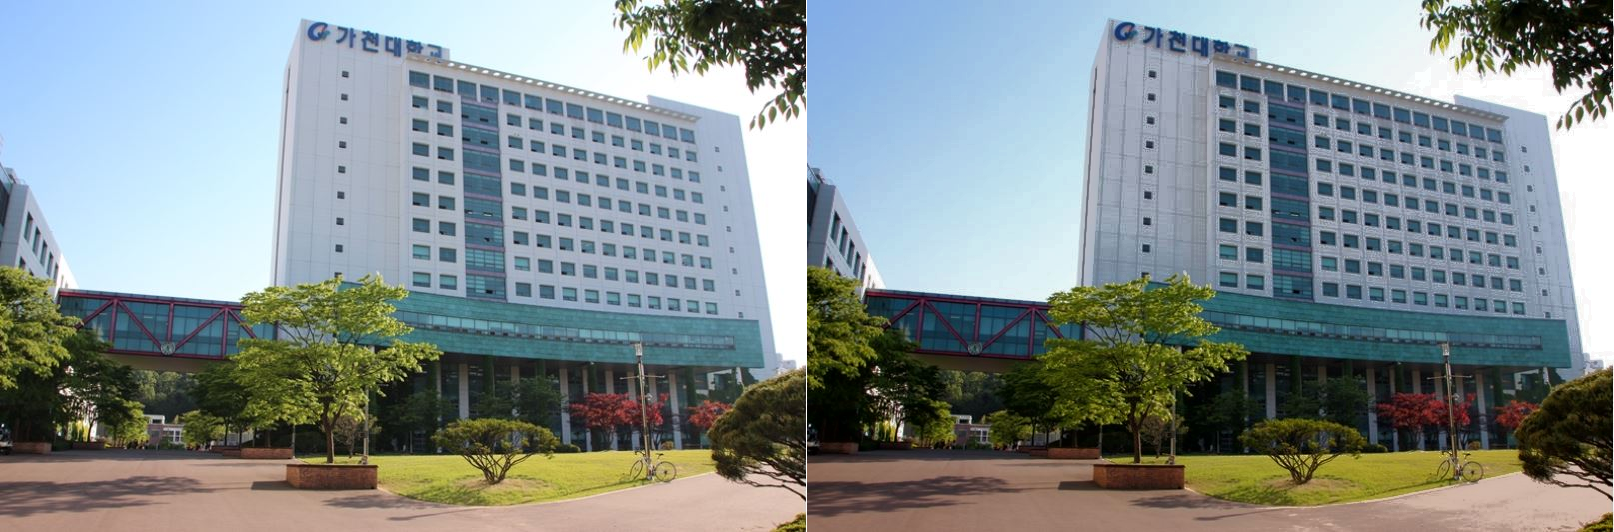

In [49]:
from google.colab.patches import cv2_imshow

cv2_imshow(gachon_hstack2_rgb)

# 결과 비교하기

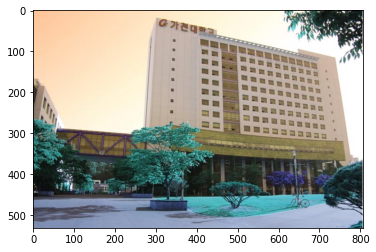

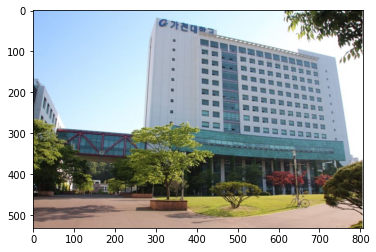

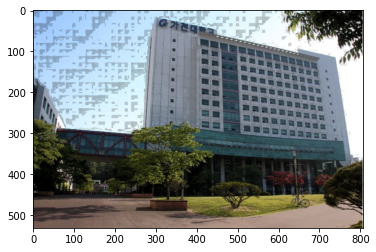

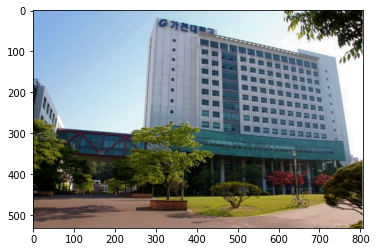

In [51]:
import matplotlib.pyplot as plt

plt.imshow(gachon)
plt.show()
plt.imshow(gachon_rgb)
plt.show()
plt.imshow(hsvDst)
plt.show()
plt.imshow(yCrCbDst)
plt.show()